In [1]:
import os 
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pyogrio import read_dataframe
import time
import glob 
import plotly.graph_objects as go
import pandas as pd
from math import sin, cos, asin, sqrt
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from pyogrio import read_dataframe
import networkx as nx
from matplotlib.pylab import cm
from pandas.api.types import is_object_dtype
from geo_northarrow import add_north_arrow
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Patch
import pylab as plt
import contextily as cx

import warnings
warnings.filterwarnings('ignore')

In [3]:
root_pth_list = [ 
    "../data/migration_data/Galveston_US_flows/inflow",
    "../data/migration_data/Galveston_US_flows/outflow" ]

root_pth_names = ["HGinflow_counties", "HGoutflow_counties"]

In [398]:
from pandas.api.types import is_object_dtype

for ri in range(len(root_pth_list)):
    root_pthi = root_pth_list[ri]
    rootnamei = root_pth_names[ri]
    csv_files = glob.glob(os.path.join(root_pthi, "*.csv")) 
    df_popflow_HG = []
    # loop over the list of csv files 
    for f in csv_files: 
        # read the csv file 
        year_fi = int( f[-6:-4] )
        population_flow_HG  = pd.read_csv(f, encoding = "ISO-8859-1") 
        if rootnamei == "HGinflow_counties":
            population_flow_HG.columns   = ['y2_statefips', 'y2_countyfips', 'y1_statefips', 
                                            'y1_countyfips', 'y1_state', 'y1_countyname', 
                                            'n1', 'n2', 'agi' ]
            if is_object_dtype( population_flow_HG.n1 ) :
                population_flow_HG['n1']     = population_flow_HG['n1'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if is_object_dtype( population_flow_HG.n2 ) :
                population_flow_HG['n2']     = population_flow_HG['n2'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if is_object_dtype( population_flow_HG.agi ) :
                population_flow_HG['agi']    = population_flow_HG['agi'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)

            population_flow_HG = population_flow_HG.loc[ 
                                 ( population_flow_HG['y2_statefips']  == 48 )&
                                 ( population_flow_HG['y2_countyfips'].isin([167] ) ) &
                                 ( population_flow_HG['y1_statefips'] == 48 ) & 
                                 ( population_flow_HG['y1_countyfips'].isin([167, 473, 201, 39, 157, 339, 291, 71]) )   
                                 ].reset_index()
            population_flow_HG['n1']     = population_flow_HG['n1'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            population_flow_HG['n2']     = population_flow_HG['n2'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            population_flow_HG['agi']    = population_flow_HG['agi'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            flow_HG = population_flow_HG.groupby(['y2_statefips',
                                                  'y2_countyfips', 
                                                  'y1_statefips',
                                                  'y1_countyfips']).agg({'n1': 'sum', 
                                                                        'n2': 'sum',
                                                                        'agi': 'sum'}).reset_index()
            #df_popflow.append( galveston_flow_df )
        else :
            population_flow_HG.columns   = ['y1_statefips', 'y1_countyfips',  'y2_statefips', 
                                           'y2_countyfips', 'y2_state', 'y2_countyname', 
                                           'n1', 'n2', 'agi' ]
            if is_object_dtype( population_flow_HG.n1 ) :
                population_flow_HG['n1']     = population_flow_HG['n1'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if  is_object_dtype( population_flow_HG.n2 ) :
                population_flow_HG['n2']     = population_flow_HG['n2'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            if  is_object_dtype( population_flow_HG.agi ) :
                population_flow_HG['agi']    = population_flow_HG['agi'].replace({',':''},regex=True).replace('d','', regex=True).apply(pd.to_numeric,1)
            population_flow_HG = population_flow_HG.loc[ 
                                ( population_flow_HG['y1_statefips']  == 48 )&
                                ( population_flow_HG['y1_countyfips'].isin([167] )  ) &
                                ( population_flow_HG['y2_statefips'] == 48 ) & 
                                ( population_flow_HG['y2_countyfips'].isin([167, 473, 201, 39, 157, 339, 291, 71]) )    ].reset_index()
            population_flow_HG['n1']     = population_flow_HG['n1'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            population_flow_HG['n2']     = population_flow_HG['n2'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            population_flow_HG['agi']    = population_flow_HG['agi'].replace({',':''},regex=True).apply(pd.to_numeric,1)
            flow_HG = population_flow_HG.groupby(['y1_statefips',
                                                  'y1_countyfips', 
                                                  'y2_statefips',
                                                  'y2_countyfips']).agg({'n1': 'sum',
                                                                        'n2': 'sum',
                                                                        'agi': 'sum'}).reset_index()

            #print( galveston_flow_df.dtypes )
        flow_HG["Year"]   = year_fi + 2000
        df_popflow_HG.append( flow_HG )

    HouGalv_popflow_rooti = pd.concat( df_popflow_HG )
    print( "Galveston population flow with {} shape {} ".format( rootnamei, HouGalv_popflow_rooti.shape ) ) 
    
    
    if rootnamei == "HGinflow_counties":
        HouGalv_popflow_rooti = HouGalv_popflow_rooti.groupby(['y2_statefips', 'y2_countyfips', 
                                   'y1_statefips', 'y1_countyfips']).agg({'n1': 'sum', 'n2': 'sum',
                                                                        'agi': 'sum'}).reset_index()
        HouGalv_popflow_rooti.columns = ['y2_statefips', 'y2_countyfips', 
                                         'y1_statefips', 'y1_countyfips',
                                         'n1', 'n2', 'agi']
    else:
        HouGalv_popflow_rooti = HouGalv_popflow_rooti.groupby(['y1_statefips', 'y1_countyfips', 
                                   'y2_statefips', 'y2_countyfips']).agg({'n1': 'sum', 'n2': 'sum',
                                                                        'agi': 'sum'}).reset_index()
        HouGalv_popflow_rooti.columns = ['y1_statefips', 'y1_countyfips', 
                                         'y2_statefips', 'y2_countyfips',
                                         'n1', 'n2', 'agi']

    out_pthi = r"../data/migration_data/Galveston_US_flows/{}.csv".format(rootnamei)
    HouGalv_popflow_rooti.to_csv( out_pthi , index=False ) 


Galveston population flow with HGinflow_counties shape (124, 8) 
Galveston population flow with HGoutflow_counties shape (124, 8) 


In [387]:
len(csv_files)

17

# Read data and plot graph

In [2]:
HG_popflow_inflow  = pd.read_csv( r"../data/migration_data/Galveston_US_flows/HGinflow_counties.csv", encoding = "ISO-8859-1" )
HG_popflow_outflow = pd.read_csv( r"../data/migration_data/Galveston_US_flows/HGoutflow_counties.csv", encoding = "ISO-8859-1" )

#HG_popflow_inflow  = HG_popflow_inflow.set_index('Year')
#HG_popflow_outflow = HG_popflow_outflow.set_index('Year')

print(HG_popflow_inflow.shape)
print(HG_popflow_outflow.shape)

print(HG_popflow_inflow)
print(HG_popflow_outflow)


(8, 7)
(8, 7)
   y2_statefips  y2_countyfips  y1_statefips  y1_countyfips         n1  \
0            48            167            48             39    12093.0   
1            48            167            48             71      631.0   
2            48            167            48            157     2930.0   
3            48            167            48            167  1731014.0   
4            48            167            48            201    68502.0   
5            48            167            48            291      636.0   
6            48            167            48            339     2669.0   
7            48            167            48            473       60.0   

          n2          agi  
0    25548.0     845250.0  
1     1278.0      40748.0  
2     5752.0     234477.0  
3  3858680.0  131791302.0  
4   134060.0    4413729.0  
5     1270.0      31040.0  
6     5050.0     176446.0  
7      101.0       2322.0  
   y1_statefips  y1_countyfips  y2_statefips  y2_countyfips        

In [3]:
HG_popflow_inflow['Dest_FIPS'] = HG_popflow_inflow['y2_statefips'].astype(str) + HG_popflow_inflow['y2_countyfips'].astype(str).str.zfill(3)
HG_popflow_inflow['Orig_FIPS'] = HG_popflow_inflow['y1_statefips'].astype(str) + HG_popflow_inflow['y1_countyfips'].astype(str).str.zfill(3)

HG_popflow_outflow['Dest_FIPS'] = HG_popflow_outflow['y2_statefips'].astype(str) + HG_popflow_outflow['y2_countyfips'].astype(str).str.zfill(3)
HG_popflow_outflow['Orig_FIPS'] = HG_popflow_outflow['y1_statefips'].astype(str) + HG_popflow_outflow['y1_countyfips'].astype(str).str.zfill(3)

In [4]:
#total_flow_HGcounty = pd.concat( [HG_popflow_inflow, HG_popflow_outflow] )
print( HG_popflow_outflow.shape, HG_popflow_inflow.shape )

(8, 9) (8, 9)


In [5]:
HG_popflow_inflow.set_index('Dest_FIPS')['n1'].subtract( HG_popflow_outflow.set_index('Orig_FIPS')['n1'], fill_value=0)

Dest_FIPS
48167      467.0
48167     -111.0
48167     -192.0
48167        0.0
48167    10595.0
48167     -110.0
48167     -601.0
48167       -5.0
Name: n1, dtype: float64

In [6]:
HG_popflow_inflow['n1'] = HG_popflow_inflow.set_index('Dest_FIPS')['n1'].subtract( HG_popflow_outflow.set_index('Orig_FIPS')['n1'], fill_value=0).values
HG_popflow_inflow['n1'] = HG_popflow_inflow.set_index('Dest_FIPS')['n2'].subtract( HG_popflow_outflow.set_index('Orig_FIPS')['n2'], fill_value=0).values
HG_popflow_inflow['n1'] = HG_popflow_inflow.set_index('Dest_FIPS')['agi'].subtract( HG_popflow_outflow.set_index('Orig_FIPS')['agi'], fill_value=0).values

In [7]:
HG_popflow_inflow.head()

,y2_statefips,y2_countyfips,y1_statefips,y1_countyfips,n1,n2,agi,Dest_FIPS,Orig_FIPS
0,48,167,48,39,164502.0,25548.0,845250.0,48167,48039
1,48,167,48,71,-8657.0,1278.0,40748.0,48167,48071
2,48,167,48,157,11060.0,5752.0,234477.0,48167,48157
3,48,167,48,167,0.0,3858680.0,131791302.0,48167,48167
4,48,167,48,201,1340148.0,134060.0,4413729.0,48167,48201


In [8]:
total_flow_HGcounty = HG_popflow_inflow
print(total_flow_HGcounty.shape)

(8, 9)


In [9]:
pth_tx_cuty         = r"../data/Texas_County_Boundaries_Detailed/County.shp"
#Geodata = gpd.read_file(fp)
read_start          = time.process_time()
tx_countydata       = read_dataframe( pth_tx_cuty )
tx_countydata['CNTY_FIPS'] = tx_countydata.CNTY_FIPS.astype(str)
tx_countydata['CNTY_FIPS'].head()

0    48013
1    48321
2    48239
3    48123
4    48493
Name: CNTY_FIPS, dtype: object

In [10]:
#read_end            = time.process_time()
HG_countydata       = tx_countydata.loc[ tx_countydata['CNTY_FIPS'].isin(['48167', '48473', 
                                                                            '48201', '48039', 
                                                                            '48157', '48339', 
                                                                            '48291', '48071']) ]
HG_countydata       = HG_countydata.to_crs({'init':'epsg:4326'})
print( HG_countydata.columns )
print( HG_countydata.shape )

#.loc[ tx_countydata['CNTY_FIPS'] ].isin([167, 473, 201, 39, 157, 339, 291, 71, 15])
# '48157', '48201', '48291', 
# '48339'])

Index(['OBJECTID', 'GID', 'CMPTRL_NBR', 'CNTY_NM', 'DIST_NM', 'DPS_NBR',
       'CNTY_FIPS', 'CNTY_NBR', 'DIST_NBR', 'MSA1990', 'MSA2000', 'MSA2010',
       'GlobalID', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')
(8, 16)


<Axes: >

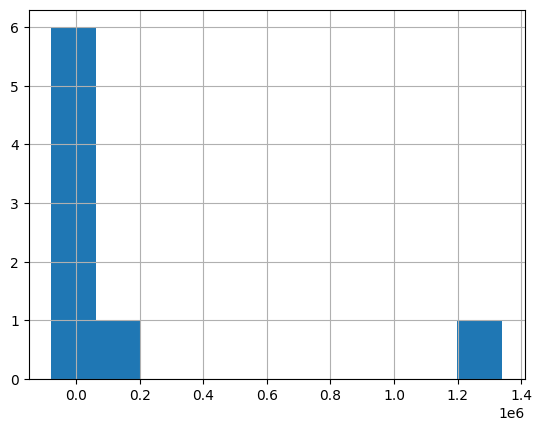

In [11]:
total_flow_HGcounty.n1.hist()

In [12]:
HG_countydata['lon'] = HG_countydata.centroid.x
HG_countydata['lat'] = HG_countydata.centroid.y

HG_countydata2 = HG_countydata[ [ 'CNTY_FIPS', 'lon', 'lat' ] ]


In [15]:
total_flow_HGcounty.shape

(8, 9)

In [13]:
new_df9 = pd.merge(total_flow_HGcounty, HG_countydata2, how='left', left_on  = ['Orig_FIPS'], right_on = ['CNTY_FIPS']) 
new_df9.columns = [ 'y2_statefips', 'y2_countyfips', 'y1_statefips', 'y1_countyfips', 
                    'n1', 'n2', 'agi', 'Dest_FIPS', 'Orig_FIPS', 'CNTY_FIPS', 'olon', 'olat' ]
new_df9 = new_df9.drop('CNTY_FIPS', axis=1)

new_df10 = pd.merge(new_df9, HG_countydata2, how='left', left_on  = ['Dest_FIPS'], right_on = ['CNTY_FIPS']) 
new_df10.columns = [ 'y2_statefips', 'y2_countyfips', 'y1_statefips', 'y1_countyfips', 
                    'n1', 'n2', 'agi', 'Dest_FIPS', 'Orig_FIPS', 'olon', 'olat',
                     'CNTY_FIPS', 'dlon', 'dlat' ]
new_df10 = new_df10.drop('CNTY_FIPS', axis=1)

new_df10['geoid'] = new_df9.Orig_FIPS

print( new_df9.shape )
print( new_df10.shape )
print( new_df10.columns)


(8, 11)
(8, 14)
Index(['y2_statefips', 'y2_countyfips', 'y1_statefips', 'y1_countyfips', 'n1',
       'n2', 'agi', 'Dest_FIPS', 'Orig_FIPS', 'olon', 'olat', 'dlon', 'dlat',
       'geoid'],
      dtype='object')


In [30]:
new_df10.geoid.unique()


array(['48039', '48071', '48157', '48167', '48201', '48291', '48339',
       '48473'], dtype=object)

In [14]:
geoid_names = {
'48039' : "Brazoria", 
'48071' : "Chambers",  
'48157' : "Fort Bend",  
'48167' : "Galveston",  
'48201' : "Harris",  
'48291' : "Liberty",  
'48339' : "Galveston", 
'48473' : "Waller"
}

In [15]:
pos = {}
lon_list = []
lat_list = []
for idx, rowi in new_df10.iterrows():
    lngi = rowi['olon']
    lati = rowi['olat']
    geoi = rowi['geoid']
    pos[ geoi ] = (lngi, lati)
    lon_list.append( lngi )
    lat_list.append( lati )


In [16]:
print( pos.keys() )
print( pos.values() )

dict_keys(['48039', '48071', '48157', '48167', '48201', '48291', '48339', '48473'])
dict_values([(-95.4557917911625, 29.19345894829992), (-94.60891988910487, 29.73912797340726), (-95.77091271712617, 29.527637662803915), (-94.96475662901314, 29.394249283841216), (-95.39782807443461, 29.859676659470193), (-94.81209938015759, 30.15153716879589), (-95.50302117472376, 30.300229395023752), (-95.98769659032193, 30.010942448005526)])


In [17]:
G = nx.DiGraph()
G.add_nodes_from( pos.keys() )
nx.set_node_attributes( G, 'coord', pos.values() )

for idx, rowi in new_df9.iterrows():
    origid = rowi['Orig_FIPS']
    destid = rowi['Dest_FIPS']
    weight = rowi['n1']
    if origid != destid and origid in pos and destid in pos:
        if weight > 0:
            G.add_edge(origid, destid, weight = weight)
        else:
            G.add_edge(destid, origid, weight = weight)
centroids = np.column_stack(( lon_list, lat_list ))
centroids
#elarge  = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1000]
#emedium = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 200]
#esmall  = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 200]

array([[-95.45579179,  29.19345895],
       [-94.60891989,  29.73912797],
       [-95.77091272,  29.52763766],
       [-94.96475663,  29.39424928],
       [-95.39782807,  29.85967666],
       [-94.81209938,  30.15153717],
       [-95.50302117,  30.3002294 ],
       [-95.98769659,  30.01094245]])

In [18]:
edge_color_map = []
#cmap0 = cm.get_cmap('BuPu', 4)
cmap0 = ["#FFE094", "#4d5174", "#313866"]

cmap0 = [ (29/255, 103/255, 149/ 255), 
               (255/255, 89/255, 89/ 255),
                (189/255, 37/255, 34/ 255) ]
#cmap0 = [ '#FD836E', '#F962A7', '#C848B9',]

edges_list = []
edgesize = []
for (u, v, d) in G.edges(data=True):
    edges_list.append((u, v))
    if d["weight"] <= -1000:
        edgesize.append(4.0)
        #edge_color_map.append( rgb2hex(cmap0(1)[:3]) )
        edge_color_map.append( cmap0[0] )
    elif d["weight"] > -1000 and d["weight"] < 0:
        edgesize.append(4.0)
        #edge_color_map.append( rgb2hex(cmap0(1)[:3]) )
        edge_color_map.append( cmap0[0] )
    elif d["weight"] > 0 and d["weight"] < 0.2e6:
        edgesize.append(4.0)
        #edge_color_map.append( rgb2hex(cmap0(2)[:3]) )
        edge_color_map.append( cmap0[2] )
    else:
        edgesize.append(4)
        #edge_color_map.append( rgb2hex(cmap0(3)[:3]) )
        edge_color_map.append( cmap0[2] )


In [19]:
#graph = queen.to_networkx()
graph = G
positions = dict(zip( graph.nodes, centroids ))
print( graph.nodes )


color_map = []
size_map = []
cmap = cm.get_cmap('GnBu', 4)


cmap = [ '#FD836E', '#F962A7', '#C848B9',]


#cmap = ["#756477" , "#d5003a", "#FFEB28"]
for node, val in G.degree():
    size_map.append( 0 )
        #color_map.append( rgb2hex(cmap(1)[:3]) )
    color_map.append( cmap[0] )
    

['48039', '48071', '48157', '48167', '48201', '48291', '48339', '48473']


In [20]:
def make_proxy(clr, mappable, **kwargs):
    return Line2D([0, 1], [0, 1], color=clr, **kwargs)

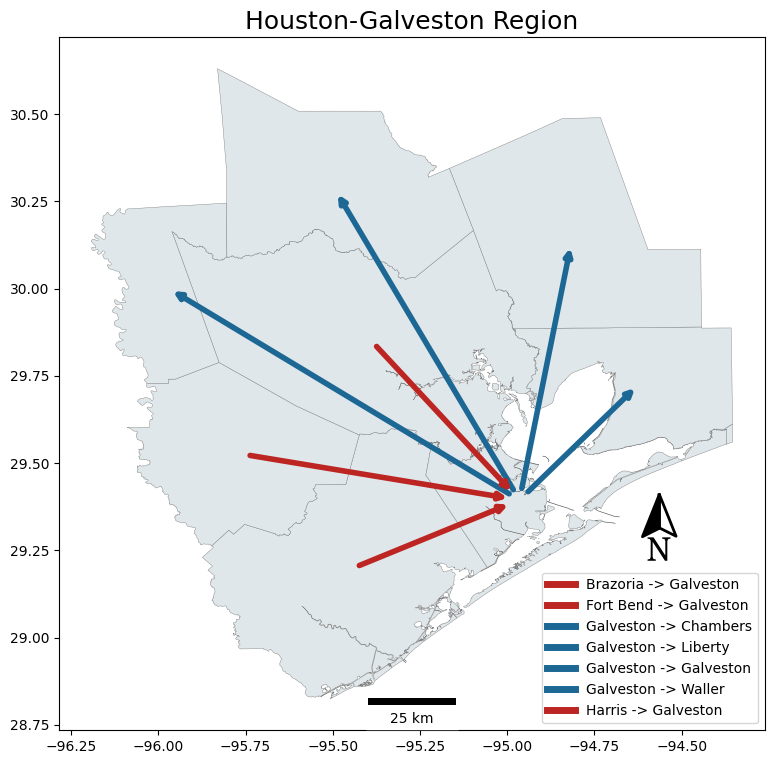

In [22]:
fig, ax = plt.subplots( figsize=(12, 9) )

HG_countydata.plot(ax = ax, linewidth= 0.3, 
                     edgecolor="grey", 
                     facecolor="#DFE7EA")

h1 = nx.draw_networkx_nodes(G, pos, node_size = size_map, 
                       node_color= color_map, ax = ax,
                       linewidths = 1)


# edges
h2 =nx.draw_networkx_edges(G, pos, edgelist= edges_list,  
                       width = edgesize, ax = ax,
                       edge_color= edge_color_map,
                       alpha = 1, arrows=True )
#nx.draw_networkx_edges(G, pos, edgelist=emedium, width  = 0.3, edge_color="b")
#nx.draw_networkx_edges(G, pos, edgelist=esmall,  width  = 0.0, 
#                       alpha=0.5, edge_color="b", style="dashed")

x, y, arrow_length = 0.85, 0.28, 0.12
add_north_arrow(ax, scale   = .55,    xlim_pos    = x, ylim_pos = y, 
                color       = '#000', text_scaler = 4, text_yT  = -1.5)
 
ax.add_artist(  ScaleBar( 100, dimension="si-length", 
                units="km", location="lower center", 
                length_fraction = 0.2) )

#ctx.add_basemap(ax)
ax.set_axis_on()
#edge_labels = nx.get_edge_attributes(G, "weights")
#nx.draw_networkx_edge_labels(G, pos, edge_labels)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)


proxies = [make_proxy(clr, h2, lw=5) for clr in edge_color_map ]
labels = ["{} -> {}".format(geoid_names[fr], geoid_names[to] ) for (fr, to) in G.edges()]
ax.legend(proxies, labels, loc='lower right')

#legend_elements = [Line2D([0], [0], marker='o', color='#FFEB28', label='High Degree Census Tract', lw=0,
#                          markerfacecolor='#FFEB28', markersize=10),
#                   Line2D([0], [0], marker='o', color='#d5003a', label='Low  Degree Census Tract', lw=0,
#                          markerfacecolor='#d5003a', markersize=10)]
#ax = plt.gca()
#ax.legend(handles=legend_elements, loc='lower right')
ax.set_title('Houston-Galveston Region', fontsize= 18)

fig.savefig('/Users/yuhan/Desktop/Writings/JCIT_00567_revision/fig_revision/GHpop_migrat_direct.png', 
            format='png', dpi=300, bbox_inches='tight')
plt.show() 

In [280]:
color_theme = [ (232/255, 17/255, 15/ 255), 
               (251/255, 199/255, 35/ 255), 
               (27/255, 106/255, 165/ 255) ]

degrees = [ val for (node, val) in G.degree( weight='weight' )  ]
#plt.hist( degrees )
print( degrees )


[0]


# Visualize Accessibility

In [23]:
Pth_hg_blk      = r'/Users/yuhan/Desktop/Gradient_Boost_code/inputs/data_export/HG_census_access.shp'
#Geodata = gpd.read_file(fp)
read_start      = time.process_time()
HG_ctcdata      = read_dataframe( Pth_hg_blk )
read_end        = time.process_time()
HG_ctcdata      = HG_ctcdata.to_crs({'init':'epsg:4326'})
HG_ctcdata.columns

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'NRI_ID', 'STATE', 'STATEABBRV',
       'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS',
       ...
       'Shape_Leng', 'geoid', 'lng', 'lat', 'Shape_Le_1', 'Shape_Area',
       'Accesbity', 'WghtAcces', 'logWgtAcc', 'geometry'],
      dtype='object', length=479)

In [24]:
HG_ctcdata.columns


Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'NRI_ID', 'STATE', 'STATEABBRV',
       'STATEFIPS', 'COUNTY', 'COUNTYTYPE', 'COUNTYFIPS',
       ...
       'Shape_Leng', 'geoid', 'lng', 'lat', 'Shape_Le_1', 'Shape_Area',
       'Accesbity', 'WghtAcces', 'logWgtAcc', 'geometry'],
      dtype='object', length=479)

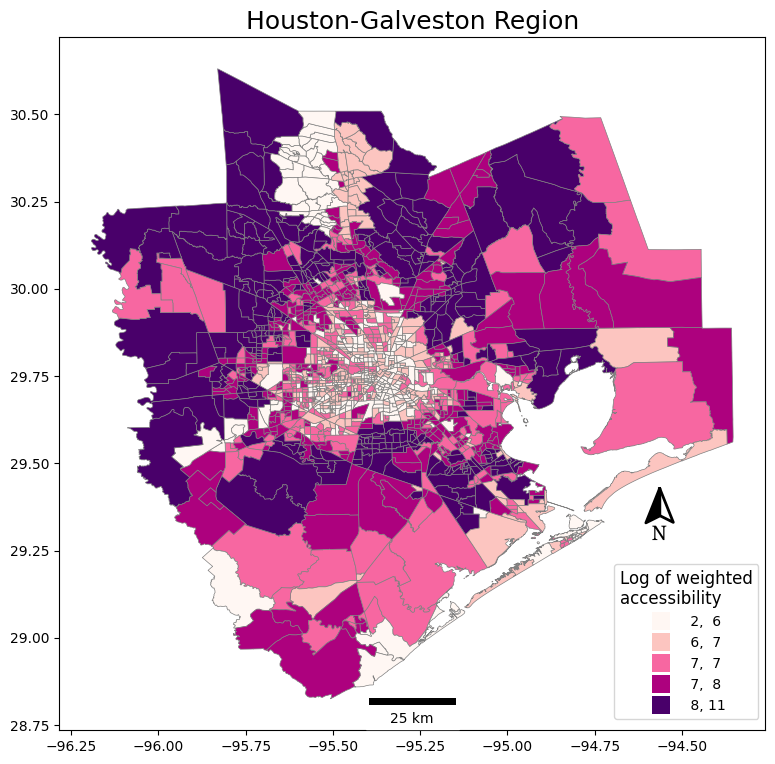

In [26]:
###############################################################################

fig, ax = plt.subplots(1, 1, figsize=(12, 9))
pmarks = []
divider = make_axes_locatable(ax)
HG_ctcdata.plot(column='logWgtAcc', 
                scheme="quantiles", k = 5,
                #scheme="user_defined", k = 5,
                #classification_kwds={'bins':[1.0e4, 2.0e4, 4.0e4, 6.0e4]},
           legend=True,
           ax=ax, cmap = 'RdPu',     
           edgecolor   = "gray",  # Borderline color
           linewidth   = 0.5,
           
           legend_kwds={'loc':'upper right', 
                        'bbox_to_anchor': (1, 0.25), 
                        'fmt':'{:.0f}',
                        'markerscale':1.26, 
                        'title_fontsize':'large', 
                        'fontsize':'medium'}
           )

leg1 = ax.get_legend()
# Set markers to square shape
for ea in leg1.legendHandles:
    ea.set_marker('s')
leg1.set_title("Log of weighted\naccessibility")

x, y, arrow_length = 0.85, 0.3, 0.12
#ax.annotate('N', xy=(x,y), xytext=(x, y-arrow_length),
#                arrowprops=dict(facecolor='k', width = 10, headwidth = 30),
#                va='center',ha='center', fontsize = 40,
#                xycoords= ax.transAxes)
add_north_arrow( ax, scale   = .45,    xlim_pos    = x, ylim_pos = y, 
                 color       = '#000', text_scaler = 3, text_yT  = -1.5 )

ax.add_artist(  ScaleBar( 100, dimension="si-length", 
                units="km", location="lower center", 
                length_fraction = 0.2) )

#ax.set_title('', fontsize= 28)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

ax.set_title('Houston-Galveston Region', fontsize= 18)

plt.savefig('/Users/yuhan/Desktop/Writings/JCIT_00567_revision/fig_revision/Accessibility.png',
            dpi=300, bbox_inches='tight')
plt.show()


In [65]:
ea